In [1]:
from pancakes import Pancakes
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from astropy.io import fits
from astropy.wcs import WCS
from astropy.table import Table

%matplotlib widget

In [ ]:
tess_file = './PS1_to_TESS/data/tess2019359002923-s0020-1-1-0165-s_ffic.fits'
savepath = './SkyCells/Sector020/'

pancakes = Pancakes(tess_file, 
                    savepath = '/Users/zgl12/Python_Scripts/SynDiff/', 
                    num_cores = 1, sector=20, use_multiple_cores_per_task = False, overwrite = True)

In [ ]:
pancakes.hot_to_serve()

In [4]:
ps1_filename = 'ds9.fits'
folder = '/Users/zgl12/Modules/SynDiff/development/PS1_to_TESS/data/'
tess_filename = 'tess2019359002923-s0020-1-1-0165-s_ffic.fits'
file = '/Users/zgl12/Python_Scripts/SynDiff/TESS_s0020_1_master_pixels2skycells.fits.gz'
skycell_csv = './skycell_coordinates.csv'

skycell_df = pd.read_csv(skycell_csv)

tess_hdul = fits.open(folder + tess_filename)
tess_data = tess_hdul[1].data
tess_header = tess_hdul[1].header
tess_wcs = WCS(tess_header)
tess_hdul.close()

ps1_hdul = fits.open(folder + ps1_filename)
ps1_data = ps1_hdul[0].data
ps1_header = ps1_hdul[0].header
ps1_wcs = WCS(ps1_header)
ps1_hdul.close()

print(ps1_data.shape)

ps1_fprint = ps1_wcs.calc_footprint()
p_xs, p_ys = tess_wcs.all_world2pix(ps1_fprint[:, 0], ps1_fprint[:, 1], 0)


(6289, 6307)


              SKYCELL  SKYCIND
952  skycell.2246.021      952
               SKYCELL  SKYCIND
1130  skycell.2247.099     1130
               SKYCELL  SKYCIND
1021  skycell.2246.090     1021


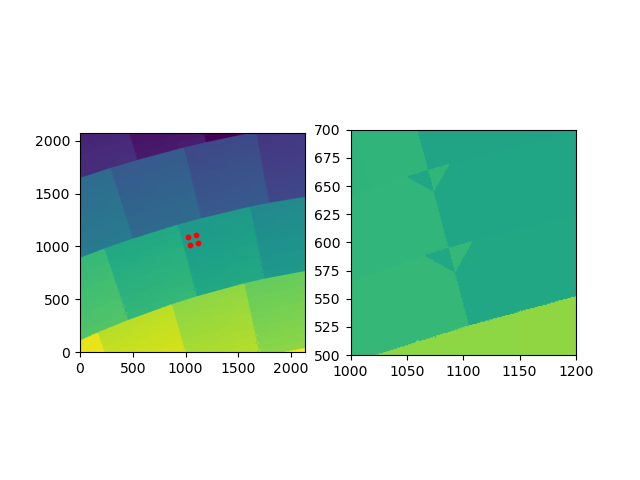

In [11]:

hdul = fits.open(file)
data = hdul[1].data
table_data = hdul[2].data
hdul.close()

tab = Table(table_data).to_pandas()

tab_f = tab[tab['SKYCELL'] == 'skycell.2246.021']

print(tab_f)

print(tab[tab['SKYCIND'] == 1130])
print(tab[tab['SKYCIND'] == 1021])

# plt.figure(figsize=(12, 12))
fig, axs = plt.subplots(1, 2, sharex=False, sharey=False)
axs[0].imshow(data, origin='lower')
axs[0].scatter(p_xs, p_ys, color='red', s = 10)
axs[1].imshow(data, origin='lower')
axs[1].set_xlim(1000, 1200)
axs[1].set_ylim(500, 700)
plt.savefig('skycell_for_tess.png', dpi = 900)
plt.show()

# PANstarrs Coordinate and Astrometry for Key Equivalent Skycells

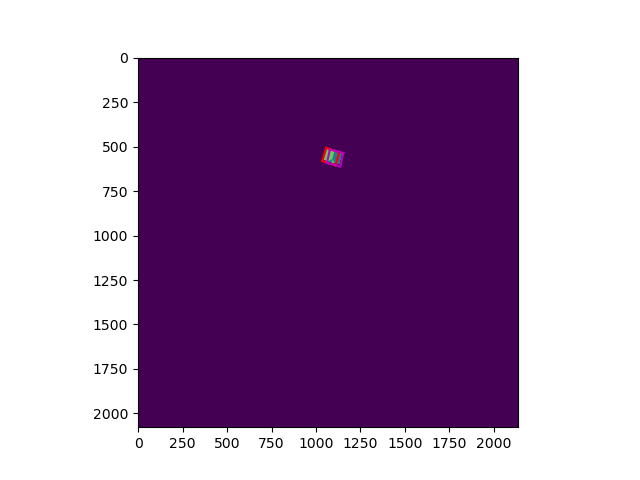

In [23]:
# data
data[(data != 1021) & (data != 1130)] = 0

plt.figure()
plt.imshow(data, vmin = 900, vmax = 1200)
# plt.scatter(t_xs, t_ys, c='r', s=10)
# plt.scatter(p_xs, p_ys, c='r', s=10)

t = skycell_df[skycell_df['Name'] == 'skycell.2247.099']
q = skycell_df[skycell_df['Name'] == 'skycell.2246.090']

ra_corners_1 = np.array([t[f'RA_Corner{i}'] for i in range(1, 5)]).flatten()
dec_corners_1 = np.array([t[f'DEC_Corner{i}'] for i in range(1, 5)]).flatten()

ra_corners_2 = np.array([q[f'RA_Corner{i}'] for i in range(1, 5)]).flatten()
dec_corners_2 = np.array([q[f'DEC_Corner{i}'] for i in range(1, 5)]).flatten()

temp_x_1, temp_y_1 = tess_wcs.all_world2pix(ra_corners_1, dec_corners_1, 0)
temp_x_2, temp_y_2 = tess_wcs.all_world2pix(ra_corners_2, dec_corners_2, 0)

plt.plot([temp_x_1[0], temp_x_1[1]], [temp_y_1[0], temp_y_1[1]], c='r')
plt.plot([temp_x_1[1], temp_x_1[2]], [temp_y_1[1], temp_y_1[2]], c='r')
plt.plot([temp_x_1[2], temp_x_1[3]], [temp_y_1[2], temp_y_1[3]], c='r')
plt.plot([temp_x_1[0], temp_x_1[3]], [temp_y_1[0], temp_y_1[3]], c='r')

plt.plot([temp_x_2[0], temp_x_2[1]], [temp_y_2[0], temp_y_2[1]], c='m')
plt.plot([temp_x_2[1], temp_x_2[2]], [temp_y_2[1], temp_y_2[2]], c='m')
plt.plot([temp_x_2[2], temp_x_2[3]], [temp_y_2[2], temp_y_2[3]], c='m')
plt.plot([temp_x_2[0], temp_x_2[3]], [temp_y_2[0], temp_y_2[3]], c='m')

# plt.plot([p_xs[0], p_xs[1]], [p_ys[0], p_ys[1]], c='r')
# plt.plot([p_xs[1], p_xs[2]], [p_ys[1], p_ys[2]], c='r')
# plt.plot([p_xs[2], p_xs[3]], [p_ys[2], p_ys[3]], c='r')
# plt.plot([p_xs[0], p_xs[3]], [p_ys[0], p_ys[3]], c='r')

# plt.xlim(950, 1125)
# plt.ylim(950, 1125)
# plt.savefig('buffer_zone.png', dpi = 900)
plt.show()
